# STAR JEANS

## 0. COMANDOS INICIAIS

In [3]:
import numpy as np
import pandas as pd

import requests
import sqlite3
import re
from datetime import datetime
from bs4 import BeautifulSoup

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

## 1. WEBSCRAPING

In [2]:
# Simular um browser
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebkit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

# Página inicial
url = 'https://www2.hm.com/en_us/men/products/jeans.html'

### 1.1. Extração do número de itens na página

In [3]:
# Requisição do API
page = requests.get(url, headers = headers)

# Transformar o html request em um objeto do beautiful soup
soup = BeautifulSoup(page.text, 'html.parser')

# Tamanho da página
itens = soup.find_all('h2')[2]

itens_shown = int(itens['data-items-shown'])
total_itens = int(itens['data-total'])

page_size = str(int(np.ceil(total_itens / itens_shown) * itens_shown))

# Nova url com o total de itens 
new_url = 'https://www2.hm.com/en_us/men/products/jeans.html?sort=stock&image-size=small&image=model&offset=0&page-size=' + page_size

### 1.2. Extração de links para cada produto na página

In [4]:
# Requisição do API
page = requests.get(new_url, headers = headers)

# Transformar o html request em um objeto do beautiful soup
soup = BeautifulSoup(page.text, 'html.parser')

# Identificar os produtos
product_item_li = soup.find_all('li', class_ = 'product-item')

# Extrair os detalhes da url
domain = 'https://www2.hm.com'
url = [domain + i.find('a')['href'] for i in product_item_li]

# Criar a estrutura do dataframe
color_info = pd.DataFrame(columns = ['color_url', 'color_id', 'color_name'])

for u in url:
    # Requisição do API
    page = requests.get(u, headers = headers)

    # Transformar o html request em um objeto do beautiful soup
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # Coletar informação sobre as cores dos produtos 
    info = soup.find_all('a', class_ = 'filter-option')
    
    # Dataframe auxiliar
    aux = pd.DataFrame(columns = ['color_url', 'color_id', 'color_name'])
    
    aux['color_url']  = [domain + i['href'] for i in info]
    aux['color_name'] = [i['title'] for i in info]
    aux['color_id']   = [i['data-articlecode'] for i in info]
    
    # Pôr as informações coletadas em um único dataframe
    color_info = pd.concat([color_info, aux], ignore_index = True)
    print(u)

# Apagar registros duplicados
color_info = color_info.drop_duplicates(keep = 'first').reset_index(drop = True)

https://www2.hm.com/en_us/productpage.1024256001.html
https://www2.hm.com/en_us/productpage.0985159001.html
https://www2.hm.com/en_us/productpage.1008549002.html
https://www2.hm.com/en_us/productpage.0875105024.html
https://www2.hm.com/en_us/productpage.0690449036.html
https://www2.hm.com/en_us/productpage.1008110001.html
https://www2.hm.com/en_us/productpage.0690449022.html
https://www2.hm.com/en_us/productpage.1008549001.html
https://www2.hm.com/en_us/productpage.1008549006.html
https://www2.hm.com/en_us/productpage.1024256004.html
https://www2.hm.com/en_us/productpage.0971061002.html
https://www2.hm.com/en_us/productpage.1024256007.html
https://www2.hm.com/en_us/productpage.0985159006.html
https://www2.hm.com/en_us/productpage.1024256002.html
https://www2.hm.com/en_us/productpage.0985159007.html
https://www2.hm.com/en_us/productpage.1004199001.html
https://www2.hm.com/en_us/productpage.1027852009.html
https://www2.hm.com/en_us/productpage.0690449051.html
https://www2.hm.com/en_us/pr

### 1.3. Extração de informações sobre cada produto

In [5]:
# Requisição do API
page = requests.get('https://www2.hm.com/en_us/productpage.0985159002.html', headers = headers)

# Transformar o html request em um objeto do beautiful soup
soup = BeautifulSoup(page.text, 'html.parser')

# Preço e nome
info1 = soup.find('div', class_ = 'inner')

if info1:
    print('ok')
    name = info1.find('h1').text
    price = info1.find('span', class_ = 'price-value').text
    print(f'name: {name}, price: {price}')
else:
    print('oh God')
    name = 'NaN'
    price = 'NaN'

info2 = soup.find('div', class_ = 'details parbase')

if info2:
    aux2 = [list(filter(None, i.get_text().split('\n'))) for i in info2.find('dl').find_all('div')]
else:
    aux2 = [['Size', 'NaN'], ['Fit', 'NaN'], ['Composition', 'NaN', 'NaN'], 
            ['Art. No.', 'NaN'], ['Product safety', 'NaN']]

    # Dataframe vazio
df_details = pd.DataFrame()

cols = ['Art. No.', 'Composition', 'Fit', 'Product safety', 'Size']
df_pattern = pd.DataFrame(columns = cols)


for url in color_info.loc[:, 'color_url']:
    # requisição do API 
    page = requests.get(url, headers = headers)

    # Transformar o html request em um objeto do beautiful soup
    soup = BeautifulSoup(page.text, 'html.parser')
     
    # Preço e nome
    info1 = soup.find('div', class_ = 'inner')
    if info1:
        name = info1.find('h1').text
        price = info1.find('span', class_ = 'price-value').text
        print(f'url: {url}, name: {name}, price: {price}')
    else:
        name = 'NaN'
        price = 'NaN'
        print('oh God')
    
    # Características dos produtos
    info2 = soup.find('div', class_ = 'details parbase')
    if info2:
        aux2 = [list(filter(None, i.get_text().split('\n'))) for i in info2.find('dl').find_all('div')]
    else:
        aux2 = [['Size', 'NaN'], ['Fit', 'NaN'], ['Composition', 'NaN', 'NaN'], 
                ['Art. No.', 'NaN'], ['Product safety', 'NaN']]
    
    # Índice
    line = color_info[color_info['color_url'] == url].index
    
    # Pôr os dados no dataframe color_info
    color_info.loc[line, 'name']    = name
    color_info.loc[line, 'price']   = price
    color_info['web_scraping_date'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    # Renomear o dataframe
    aux2 = pd.DataFrame(aux2).T
    aux2.columns = aux2.iloc[0]
    
    # Apagar a primeira linha
    aux2 = aux2.iloc[1:].fillna(method = 'ffill')
    
    # Garantir o mesmo número de colunas
    aux2 = pd.concat([df_pattern, aux2], axis = 0)
    
    # Todos os detalhes dos produtos
    df_details = pd.concat([df_details, aux2], axis = 0)
       
# Atualizar o índice   
df_details = df_details.reset_index(drop = True)

# Fazer o merge
df = df_details.merge(color_info, left_on = 'Art. No.', right_on = 'color_id')

ok
name: Skinny Jeans, price: 
                $19.99
url: https://www2.hm.com/en_us/productpage.1024256001.html, name: Slim Jeans, price: 
                $19.99
url: https://www2.hm.com/en_us/productpage.1024256002.html, name: Slim Jeans, price: 
                $19.99
url: https://www2.hm.com/en_us/productpage.1024256003.html, name: Slim Jeans, price: 
                $19.99
url: https://www2.hm.com/en_us/productpage.1024256004.html, name: Slim Jeans, price: 
                $19.99
url: https://www2.hm.com/en_us/productpage.1024256005.html, name: Slim Jeans, price: 
                $19.99
url: https://www2.hm.com/en_us/productpage.1024256006.html, name: Slim Jeans, price: 
                $19.99
url: https://www2.hm.com/en_us/productpage.1024256007.html, name: Slim Jeans, price: 
                $19.99
url: https://www2.hm.com/en_us/productpage.1024256008.html, name: Slim Jeans, price: 
                $19.99
url: https://www2.hm.com/en_us/productpage.0985159001.html, name: Skinny J

url: https://www2.hm.com/en_us/productpage.1013317001.html, name: Hybrid Regular Tapered Joggers, price: 
                $44.99
url: https://www2.hm.com/en_us/productpage.1013317002.html, name: Hybrid Regular Tapered Joggers, price: 
                $44.99
url: https://www2.hm.com/en_us/productpage.1013317004.html, name: Hybrid Regular Tapered Joggers, price: 
                $20.99
url: https://www2.hm.com/en_us/productpage.1013317005.html, name: Hybrid Regular Tapered Joggers, price: 
                $44.99
url: https://www2.hm.com/en_us/productpage.1013317006.html, name: Hybrid Regular Tapered Joggers, price: 
                $44.99
url: https://www2.hm.com/en_us/productpage.1013317008.html, name: Hybrid Regular Tapered Joggers, price: 
                $15.99
url: https://www2.hm.com/en_us/productpage.1013317010.html, name: Hybrid Regular Tapered Joggers, price: 
                $22.99
url: https://www2.hm.com/en_us/productpage.1013317012.html, name: Hybrid Regular Tapered Joggers,

## 2. LIMPEZA DOS DADOS

In [21]:
df1 = df.copy()

In [22]:
df1['price'] = df1['price'].apply(lambda x: x.replace('$', '')).str.strip()

df1 = df1[~df1['Composition'].str.contains('Pocket lining:', na = False)]
df1 = df1[~df1['Composition'].str.contains('Lining:', na = False)]
df1 = df1[~df1['Composition'].str.contains('Pocket:', na = False)]

df1 = df1.reset_index(drop = True)

for i in df1[df1['Composition'].str.contains('Shell:', na = False)]['Composition']:
    line = df1[df1['Composition'] == i].index
    df1.loc[line, 'Composition'] = i.split(': ')[1]

df1['Art. No.'] = df1['Art. No.'].astype(int)

df1['price'] = df1['price'].astype(float)

df1['web_scraping_date'] = pd.to_datetime(df1['web_scraping_date'], format = '%Y-%m-%d %H:%M:%S')

# size number
df1['size_number'] = df1['Size'].apply(lambda x: re.search('\d{3}cm', x).group(0) if pd.notnull(x) else x)
df1['size_number'] = df1['size_number'].apply(lambda x: re.search('\d{3}', x).group(0) if pd.notnull(x) else x)

# size model
df1['size_model'] = df1['Size'].str.extract('(\d+/\\d+)')

In [23]:
# Separando os materiais na composição do produto

for j in ['Pocket lining: ', 'Shell: ', 'Lining: ', 'Pocket: ']:
    df.Composition = [ic.strip() for ic in df.Composition.str.replace(j, '')]
    
df_ref = pd.DataFrame( index = range(len(df)), columns=['cotton_', 'polyester_', 'spandex_', 'elasterell_'] )

df3 = df.Composition.str.split(',', expand=True).reset_index(drop=True)

df_cot0 = df3.loc[df3[0].str.contains('Cotton', na=True ), 0] # Need a For Loop on This.
df_cot1 = df3.loc[df3[1].str.contains('Cotton', na=True ), 1]
df_cot0.name, df_cot1.name = ['cotton', 'cotton']

df_cott = df_cot0.combine_first( df_cot1 )
df_ref = pd.concat( [df_ref, df_cott], axis=1 ).drop( columns=['cotton_'], axis=1 )

df_poly0 = df3.loc[df3[0].str.contains('Polyester', na=True), 0]
df_poly1 = df3.loc[df3[1].str.contains('Polyester', na=True), 1]
df_poly0.name, df_poly1.name = ['polyester']*2

df_poly = df_poly0.combine_first( df_poly1 )
df_ref = pd.concat( [df_ref, df_poly], axis=1 ).drop( columns=['polyester_'], axis=1 )

df_sp0 = df3.loc[df3[1].str.contains('Spandex', na=True), 1]
df_sp1 = df3.loc[df3[2].str.contains('Spandex', na=True), 2]
df_sp0.name, df_sp1.name = ['spandex']*2

df_sp = df_sp0.combine_first( df_sp1 )
df_ref = pd.concat( [df_ref, df_sp], axis=1 ).drop( columns=['spandex_'], axis=1 )

df_el = df3.loc[df3[1].str.contains('Elasterell', na=True), 1]
df_el.name = 'elasterell'

df_ref = pd.concat( [df_ref, df_el], axis=1 ).drop( columns=['elasterell_'], axis=1 )

for f in df_ref.columns.tolist():
    df_ref[f] = df_ref[f].fillna(f.title() + ' 0%')
    df_ref[f] = df_ref[f].apply( lambda x: int(re.search('\d+', x).group(0))/100 )

In [24]:
df4 = pd.concat([df1, df_ref], axis=1 )

In [25]:
# Selecionar variáveis
df5 = df4[['Art. No.', 'Composition', 'Fit', 'color_name', 'name', 'price', 'size_number', 'size_model', 'cotton', 'polyester',
         'spandex', 'elasterell', 'color_url', 'web_scraping_date']]

# Renomear colunas
df5 = df5.rename(columns = {'Art. No.': 'ID', 'Composition': 'Composição', 'Fit': 'Estilo', 'color_name': 'Cor', 'name': 'Tipo',
                          'price': 'Preco', 'size_number': 'Tamanho_num', 'size_model': 'Tamanho_modelo', 'cotton': 'Algodao', 
                          'polyester': 'Poliester', 'spandex': 'Spandex', 'elasterell': 'Elasterell', 'color_url': 'URL', 
                          'web_scraping_date': 'Data-de-acesso'})

In [26]:
df5

,ID,Composição,Estilo,Cor,Tipo,Preco,Tamanho_num,Tamanho_modelo,Algodao,Poliester,Spandex,Elasterell,URL,Data-de-acesso
0,1024256001,"Cotton 99%, Spandex 1%",Slim fit,Black,Slim Jeans,19.99,185,31/32,0.99,0.00,0.01,0.0,https://www2.hm.com/en_us/productpage.10242560...,2022-07-11 16:57:26
1,1024256001,"Polyester 65%, Cotton 35%",Slim fit,Black,Slim Jeans,19.99,185,31/32,0.35,0.65,0.00,0.0,https://www2.hm.com/en_us/productpage.10242560...,2022-07-11 16:57:26
2,1024256002,"Cotton 99%, Spandex 1%",Slim fit,Light denim blue,Slim Jeans,19.99,189,31/32,0.99,0.00,0.01,0.0,https://www2.hm.com/en_us/productpage.10242560...,2022-07-11 16:57:26
3,1024256002,"Polyester 65%, Cotton 35%",Slim fit,Light denim blue,Slim Jeans,19.99,189,31/32,0.35,0.65,0.00,0.0,https://www2.hm.com/en_us/productpage.10242560...,2022-07-11 16:57:26
4,1024256003,"Cotton 99%, Spandex 1%",Slim fit,Light denim blue,Slim Jeans,19.99,187,31/32,0.99,0.00,0.01,0.0,https://www2.hm.com/en_us/productpage.10242560...,2022-07-11 16:57:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,985197005,"Polyester 65%, Cotton 35%",Slim fit,Dark denim blue,Slim Jeans,15.99,NaN,NaN,0.35,0.65,0.00,0.0,https://www2.hm.com/en_us/productpage.09851970...,2022-07-11 16:57:26
219,985197006,"Cotton 99%, Spandex 1%",Slim fit,Light denim blue,Slim Jeans,19.99,NaN,NaN,0.99,0.00,0.01,0.0,https://www2.hm.com/en_us/productpage.09851970...,2022-07-11 16:57:26
220,985197006,"Polyester 65%, Cotton 35%",Slim fit,Light denim blue,Slim Jeans,19.99,NaN,NaN,0.35,0.65,0.00,0.0,https://www2.hm.com/en_us/productpage.09851970...,2022-07-11 16:57:26
221,985197007,"Cotton 99%, Spandex 1%",Slim fit,Dark gray,Slim Jeans,15.99,187,31/32,0.99,0.00,0.01,0.0,https://www2.hm.com/en_us/productpage.09851970...,2022-07-11 16:57:26


In [27]:
df6 = df5.dropna()

In [28]:
# Salvar a base de dados
df6.to_csv('Dados/star-jeans-1.csv')

## 3 - DESCRIÇÃO DOS DADOS

In [4]:
dados = pd.read_csv('Dados/star-jeans-1.csv')

In [5]:
dados.head()

,Unnamed: 0,ID,Composição,Estilo,Cor,Tipo,Preco,Tamanho_num,Tamanho_modelo,Algodao,Poliester,Spandex,Elasterell,URL,Data-de-acesso
0,0,1024256001,"Cotton 99%, Spandex 1%",Slim fit,Black,Slim Jeans,19.99,185,31/32,0.99,0.00,0.01,0.0,https://www2.hm.com/en_us/productpage.10242560...,2022-07-11 16:57:26
1,1,1024256001,"Polyester 65%, Cotton 35%",Slim fit,Black,Slim Jeans,19.99,185,31/32,0.35,0.65,0.00,0.0,https://www2.hm.com/en_us/productpage.10242560...,2022-07-11 16:57:26
2,2,1024256002,"Cotton 99%, Spandex 1%",Slim fit,Light denim blue,Slim Jeans,19.99,189,31/32,0.99,0.00,0.01,0.0,https://www2.hm.com/en_us/productpage.10242560...,2022-07-11 16:57:26
3,3,1024256002,"Polyester 65%, Cotton 35%",Slim fit,Light denim blue,Slim Jeans,19.99,189,31/32,0.35,0.65,0.00,0.0,https://www2.hm.com/en_us/productpage.10242560...,2022-07-11 16:57:26
4,4,1024256003,"Cotton 99%, Spandex 1%",Slim fit,Light denim blue,Slim Jeans,19.99,187,31/32,0.99,0.00,0.01,0.0,https://www2.hm.com/en_us/productpage.10242560...,2022-07-11 16:57:26


In [6]:
dados.columns

Index(['Unnamed: 0', 'ID', 'Composição', 'Estilo', 'Cor', 'Tipo', 'Preco',
       'Tamanho_num', 'Tamanho_modelo', 'Algodao', 'Poliester', 'Spandex',
       'Elasterell', 'URL', 'Data-de-acesso'],
      dtype='object')

In [7]:
# Excuir colunas que não serão utilizadas na análise
dados1 = dados.drop(['Unnamed: 0', 'URL', 'Data-de-acesso'], axis = 1)

In [8]:
# Verificar o tipo dos dados
dados1.dtypes

ID                  int64
Composição         object
Estilo             object
Cor                object
Tipo               object
Preco             float64
Tamanho_num         int64
Tamanho_modelo     object
Algodao           float64
Poliester         float64
Spandex           float64
Elasterell        float64
dtype: object

In [9]:
# Verificar o número de produtos (linhas) e características (colunas) que compõem o conjunto de dados
print('Número de produtos selcionados para a análise: {}.'.format(dados1.shape[0]))
print('Número de características dos produtos (colunas): {}.'.format(dados1.shape[1]))

Número de produtos selcionados para a análise: 87.
Número de características dos produtos (colunas): 12.


In [13]:
# Salvar a base de dados
dados1.to_excel('Dados/star-jeans-2.xlsx')

## 4 - ANÁLISE EXPLORATÓRIA DE DADOS 

### Preço médio, mínimo e máximo dos produtos (calças jeans masculinas) vendidos pela H&M:

In [10]:
preco_medio = np.round(dados1['Preco'].mean(), 2)
preco_minimo = np.round(dados1['Preco'].max(), 2)
preco_maximo = np.round(dados1['Preco'].min(), 2)

print("O preço médio das calças jeans vendidas pela H&M é: US${}.".format(preco_medio))
print("O preço mínimo das calças jeans vendidas pela H&M é: US${}.".format(preco_minimo))
print("O preço máximo das calças jeans vendidas pela H&M é: US${}.".format(preco_maximo))

O preço médio das calças jeans vendidas pela H&M é: US$29.86.
O preço mínimo das calças jeans vendidas pela H&M é: US$49.99.
O preço máximo das calças jeans vendidas pela H&M é: US$12.99.


### Preço médio dos produtos (calças jeans masculinas) vendidos pela H&M por tipo/estilo:

In [11]:
preco_medio_tipo = np.round(dados1[['Preco', 'Tipo']].groupby('Tipo').mean().reset_index(), 2)
preco_medio_tipo

,Tipo,Preco
0,Freefit® Slim Jeans,49.99
1,Hybrid Regular Denim Joggers,39.99
2,Loose Jeans,39.99
3,Regular Jeans,22.99
4,Relaxed Jeans,30.28
5,Skinny Jeans,27.40
6,Slim Jeans,20.39
7,Slim Tapered Jeans,38.32


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Freefit® Slim Jeans'),
  Text(1, 0, 'Hybrid Regular Denim Joggers'),
  Text(2, 0, 'Loose Jeans'),
  Text(3, 0, 'Regular Jeans'),
  Text(4, 0, 'Relaxed Jeans'),
  Text(5, 0, 'Skinny Jeans'),
  Text(6, 0, 'Slim Jeans'),
  Text(7, 0, 'Slim Tapered Jeans')])

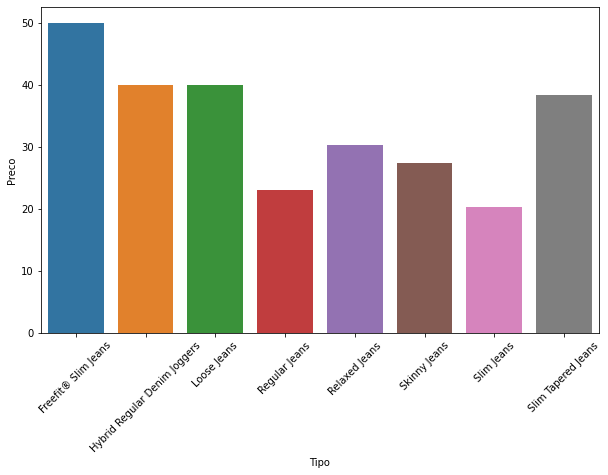

In [17]:
plt.figure(figsize = (10,6))
df = dados1[['Preco', 'Tipo']].groupby('Tipo').mean().reset_index()
sns.barplot(x = 'Tipo', y = 'Preco', data = df);
plt.xticks(rotation = 45)

### Quantidade de diferentes produtos (calças jeans masculinas) conforme o tipo/estilo:

In [72]:
n_calcas_freefit = dados1[(dados1['Tipo'] == 'Freefit® Slim Jeans')].shape[0]
n_calcas_hybrid = dados1[(dados1['Tipo'] == 'Hybrid Regular Denim Joggers')].shape[0]
n_calcas_loose = dados1[(dados1['Tipo'] == 'Loose Jeans')].shape[0]
n_calcas_regular = dados1[(dados1['Tipo'] == 'Regular Jeans')].shape[0]
n_calcas_relaxed = dados1[(dados1['Tipo'] == 'Relaxed Jeans')].shape[0]
n_calcas_skinny = dados1[(dados1['Tipo'] == 'Skinny Jeans')].shape[0]
n_calcas_slim = dados1[(dados1['Tipo'] == 'Slim Tapered Jeans')].shape[0]

print( "O número de calças do tipo 'Freefit® Slim Jeans' é: {}.".format(n_calcas_freefit))
print( "O número de calças do tipo 'Hybrid Regular Denim Joggers' é: {}.".format(n_calcas_hybrid))
print( "O número de calças do tipo 'Loose Jeans' é: {}.".format(n_calcas_loose))
print( "O número de calças do tipo 'Regular Jeans' é: {}.".format(n_calcas_regular))
print( "O número de calças do tipo 'Relaxed Jeans' é: {}.".format(n_calcas_relaxed))
print( "O número de calças do tipo 'Skinny Jeans' é: {}.".format(n_calcas_skinny))
print( "O número de calças do tipo 'Slim Tapered Jeans' é: {}.".format(n_calcas_slim))

O número de calças do tipo 'Freefit® Slim Jeans' é: 8.
O número de calças do tipo 'Hybrid Regular Denim Joggers' é: 1.
O número de calças do tipo 'Loose Jeans' é: 2.
O número de calças do tipo 'Regular Jeans' é: 10.
O número de calças do tipo 'Relaxed Jeans' é: 17.
O número de calças do tipo 'Skinny Jeans' é: 17.
O número de calças do tipo 'Slim Tapered Jeans' é: 12.


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

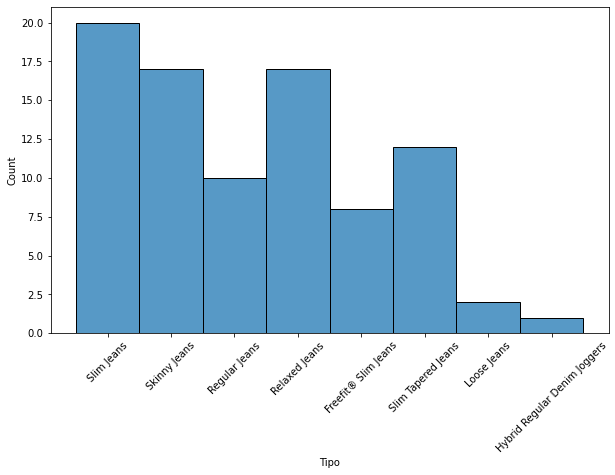

In [25]:
plt.figure(figsize = (10,6))
fig = sns.histplot(data = dados1, x = 'Tipo')
plt.xticks(rotation = 45)

### Quantidade de diferentes produtos (calças jeans masculinas) conforme a cor:

In [29]:
n_calcas_black = dados1[(dados1['Cor'] == 'Black')].shape[0]
n_calcas_blackt = dados1[(dados1['Cor'] == 'Black/trashed')].shape[0]
n_calcas_darkb = dados1[(dados1['Cor'] == 'Dark blue')].shape[0]
n_calcas_darkdb = dados1[(dados1['Cor'] == 'Dark denim blue')].shape[0]
n_calcas_darkg = dados1[(dados1['Cor'] == 'Dark gray')].shape[0]
n_calcas_denimb = dados1[(dados1['Cor'] == 'Denim blue')].shape[0]
n_calcas_graphiteg = dados1[(dados1['Cor'] == 'Graphite gray')].shape[0]
n_calcas_gray = dados1[(dados1['Cor'] == 'Gray')].shape[0]
n_calcas_ldenimb = dados1[(dados1['Cor'] == 'Light denim blue')].shape[0]
n_calcas_ldenimbt = dados1[(dados1['Cor'] == 'Light denim blue/trashed')].shape[0]
n_calcas_paledb = dados1[(dados1['Cor'] == 'Pale denim blue')].shape[0]
n_calcas_white = dados1[(dados1['Cor'] == 'White')].shape[0]

print( "Calcas 'Black': {}".format(n_calcas_black))
print( "Calças 'Black/trashed': {}".format(n_calcas_blackt))
print( "Calças 'Dark blue': {}".format(n_calcas_darkb))
print( "Calças 'Dark denim blue': {}".format(n_calcas_darkdb))
print( "Calças 'Dark gray': {}".format(n_calcas_darkg))
print( "Calças 'Denim blue': {}".format(n_calcas_denimb))
print( "Calças 'Graphite gray': {}".format(n_calcas_graphiteg))
print( "Calças 'Gray': {}".format(n_calcas_gray))
print( "Calças 'Light denim blue': {}".format(n_calcas_ldenimb))
print( "Calças 'Light denim blue/trashed': {}".format(n_calcas_ldenimbt))
print( "Calças 'Pale denim blue': {}".format(n_calcas_paledb))
print( "Calças 'White': {}".format(n_calcas_white))

Calcas 'Black': 13
Calças 'Black/trashed': 2
Calças 'Dark blue': 4
Calças 'Dark denim blue': 11
Calças 'Dark gray': 8
Calças 'Denim blue': 11
Calças 'Graphite gray': 2
Calças 'Gray': 1
Calças 'Light denim blue': 25
Calças 'Light denim blue/trashed': 2
Calças 'Pale denim blue': 4
Calças 'White': 4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

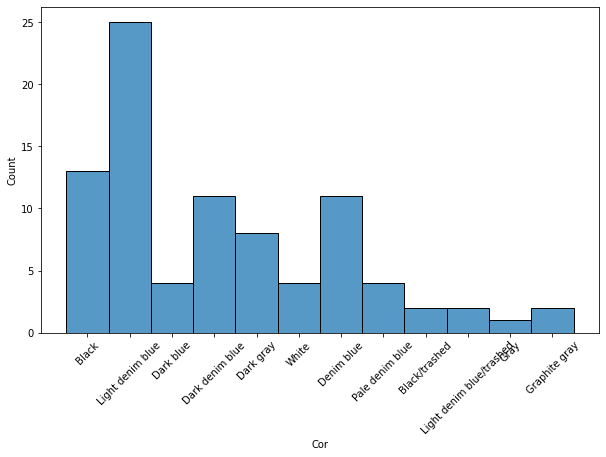

In [30]:
plt.figure(figsize = (10,6))
fig = sns.histplot(data = dados1, x = 'Cor')
plt.xticks(rotation = 45)

### Preço médio dos produtos (calças jeans masculinas) conforme a cor:

In [31]:
preco_medio_cor = np.round(dados1[['Preco', 'Cor']].groupby('Cor').mean().reset_index(), 2)
preco_medio_cor

,Cor,Preco
0,Black,28.84
1,Black/trashed,39.99
2,Dark blue,19.99
3,Dark denim blue,31.35
4,Dark gray,18.99
5,Denim blue,36.35
6,Graphite gray,39.99
7,Gray,39.99
8,Light denim blue,28.27
9,Light denim blue/trashed,39.99


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'Black/trashed'),
  Text(2, 0, 'Dark blue'),
  Text(3, 0, 'Dark denim blue'),
  Text(4, 0, 'Dark gray'),
  Text(5, 0, 'Denim blue'),
  Text(6, 0, 'Graphite gray'),
  Text(7, 0, 'Gray'),
  Text(8, 0, 'Light denim blue'),
  Text(9, 0, 'Light denim blue/trashed'),
  Text(10, 0, 'Pale denim blue'),
  Text(11, 0, 'White')])

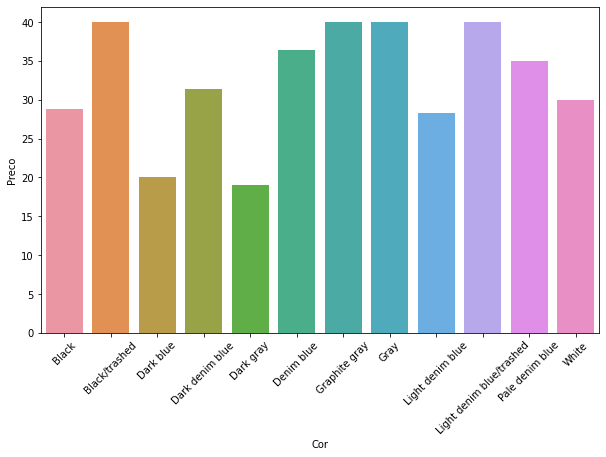

In [16]:
plt.figure(figsize = (10,6))
df = dados1[['Preco', 'Cor']].groupby('Cor').mean().reset_index()
sns.barplot(x = 'Cor', y = 'Preco', data = df);
plt.xticks(rotation = 45)

### Quantidade de diferentes produtos (calças jeans masculinas) conforme o tamanho:

(array([174., 176., 178., 180., 182., 184., 186., 188., 190.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

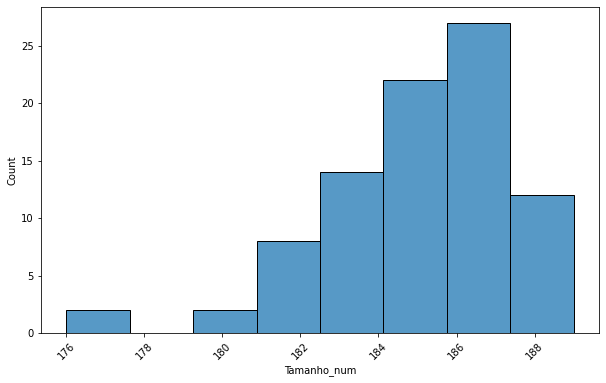

In [32]:
plt.figure(figsize = (10,6))
fig = sns.histplot(data = dados1, x = 'Tamanho_num')
plt.xticks(rotation = 45)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

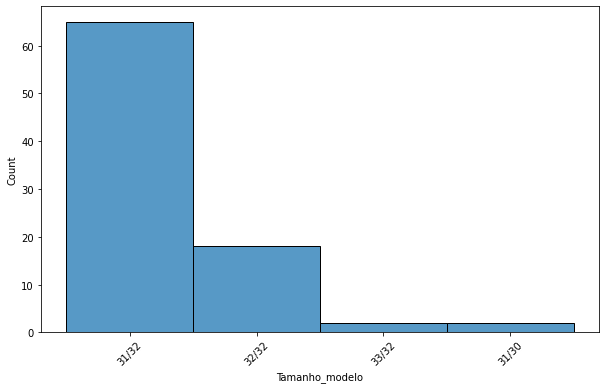

In [33]:
plt.figure(figsize = (10,6))
fig = sns.histplot(data = dados1, x = 'Tamanho_modelo')
plt.xticks(rotation = 45)

### Preço médio dos produtos (calças jeans masculinas) conforme o tamanho:

In [19]:
preco_medio_cor = np.round(dados1[['Preco', 'Tamanho_num']].groupby('Tamanho_num').mean().reset_index(), 2)
preco_medio_cor

,Tamanho_num,Preco
0,176,19.99
1,180,19.99
2,182,29.99
3,183,26.74
4,184,29.99
5,185,28.08
6,187,34.21
7,188,49.99
8,189,25.59


### Composição média 

In [46]:
algodao = round(dados1['Algodao'].mean(), 2)
poliester = round(dados['Poliester'].mean(), 2)
spandex = round(dados1['Spandex'].mean(), 2)
elasterell = round(dados1['Elasterell'].mean(), 2)

print(algodao)
print(poliester)
print(spandex)
print(elasterell)

0.78
0.22
0.01
0.0


## FIM